Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
from sklearn.model_selection import train_test_split
from math import exp
import seaborn as sb

Reading the Dataset


In [2]:
data = pd.read_csv("diabetes.csv")

Checking wheather the Dataset is loaded or not

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking the number of rows and columns in the given dataset

In [4]:
data.shape

(768, 9)

Removing duplicates 

In [5]:
data.drop_duplicates(inplace = True)

Check the new data shape if any duplicates got removed

In [6]:
data.shape

(768, 9)

Print Corelation Matrix

In [7]:
correlation_matrix = data.corr()
print('Classification Data Correlation Matrix:\n', correlation_matrix)

Classification Data Correlation Matrix:
                           Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


Plot Correlation Matrix

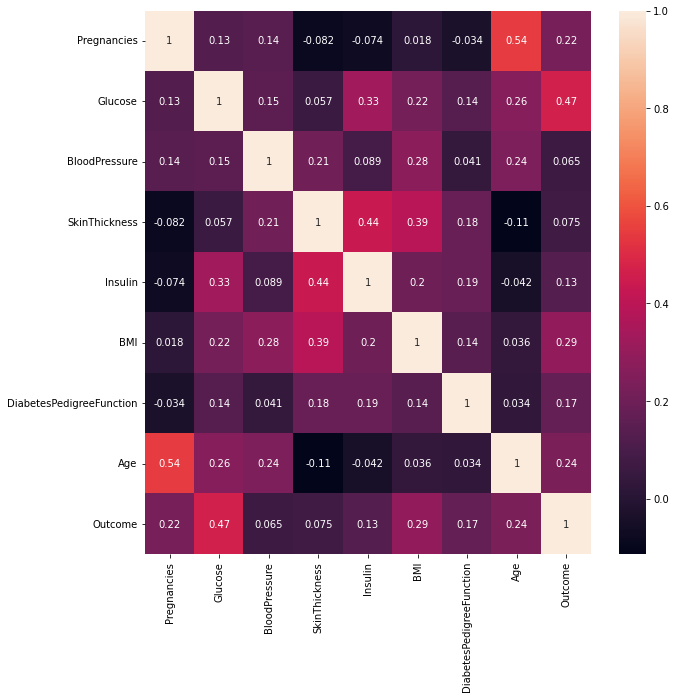

In [8]:
pt.figure(figsize=(10, 10))
sb.heatmap(data=correlation_matrix, annot=True)
pt.show()

Data Partitioning: Divide the data into training set and testing set

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(data.loc[:, 'Pregnancies':'Age'],data['Outcome'] ,test_size=0.20, random_state=42)

Split Data into training set and validation set

In [10]:
X_train_Val, X_val, Y_train_Val, Y_val = train_test_split(X_train,Y_train, test_size=0.25,random_state=42)

# **Part 1: Implementing Logistic Regression**

Function to Normalize Data

In [11]:
#Function to perform Data Normalization
def normalize(X):
  a=X-X.mean()
  b=X.max()-X.min()
  return a/b

Now perform Regression

In [12]:
#Function to perform Logistic Regression
def logistic_Regression(X,Y,epoch,learningRate):
  w0=w1=w2=w3=w4=w5=w6=w7=w8=0
  epochs=epoch
  learningRate = learningRate
  X=normalize(X)  #Normalizing Training data
  for i in range(epochs):
    #predict the y value
    y_pred = predict(X,w0,w1,w2,w3,w4,w5,w6,w7,w8)
    #Partial derivative Equations
    pdw0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred)) 
    pdw1 = -2 * sum(X['Pregnancies'] * (Y - y_pred) * y_pred * (1 - y_pred))
    pdw2 = -2 * sum(X['Glucose']*(Y - y_pred) * y_pred * (1 - y_pred))  
    pdw3 = -2 * sum(X['BloodPressure']* (Y - y_pred) * y_pred * (1 - y_pred))
    pdw4 = -2 * sum(X['SkinThickness']*(Y - y_pred) * y_pred * (1 - y_pred))  
    pdw5 = -2 * sum(X['Insulin'] * (Y - y_pred) * y_pred * (1 - y_pred))
    pdw6 = -2 * sum(X['BMI']*(Y - y_pred) * y_pred * (1 - y_pred))  
    pdw7 = -2 * sum(X['DiabetesPedigreeFunction'] * (Y - y_pred) * y_pred * (1 - y_pred))
    pdw8 = -2 * sum(X['Age']*(Y - y_pred) * y_pred * (1 - y_pred))  
    
    #updating weights
    w0 = w0 - learningRate * pdw0
    w1 = w1 - learningRate * pdw1
    w2 = w2 - learningRate * pdw2
    w3 = w3 - learningRate * pdw3
    w4 = w4 - learningRate * pdw4
    w5 = w5 - learningRate * pdw5
    w6 = w6 - learningRate * pdw6
    w7 = w7 - learningRate * pdw7
    w8 = w8 - learningRate * pdw8
    
  return w0,w1,w2,w3,w4,w5,w6,w7,w8

Function to predict Y value

In [13]:
def predict(data,w0,w1,w2,w3,w4,w5,w6,w7,w8):
  sigmoidArray=[]
  for x in range(data.shape[0]):
    sigmoidEquation = 1 / (1 + exp(-1*w0 + -1*w1*(data['Pregnancies'].iloc[x]) + -1*w2*(data['Glucose'].iloc[x])+ -1*w3*(data['BloodPressure'].iloc[x])+ -1*w4*(data['SkinThickness'].iloc[x])+ -1*w5*(data['Insulin'].iloc[x])+ -1*w6*(data['BMI'].iloc[x])+ -1*w7*(data['DiabetesPedigreeFunction'].iloc[x])+ -1*w8*(data['Age'].iloc[x])))
    sigmoidArray.append(sigmoidEquation)
  numpyArray=np.array(sigmoidArray)
  return numpyArray

Now find the Validation Accuracy

In [14]:
w0,w1,w2,w3,w4,w5,w6,w7,w8 = logistic_Regression(X_train_Val, Y_train_Val,300,0.1)
X_val = normalize(X_val)
y_pred_initial = predict(X_val,w0,w1,w2,w3,w4,w5,w6,w7,w8)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred_initial] #### Selected threshold is 0.5
accuracy = 0
for index in range(len(y_pred)):
     if y_pred[index] == Y_val.iloc[index]:
        accuracy += 1
        
print("Validation Accuracy = ", (accuracy / len(y_pred))*100,"%")

Validation Accuracy =  78.57142857142857 %


Now find Test Accuracy

In [15]:
w0,w1,w2,w3,w4,w5,w6,w7,w8 = logistic_Regression(X_train, Y_train,300,0.1)
X_tst = normalize(X_test)
y_pred = predict(X_tst,w0,w1,w2,w3,w4,w5,w6,w7,w8)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred] #### Selected threshold is 0.5
accuracy = 0
for index in range(len(y_pred)):
    if y_pred[index] == Y_test.iloc[index]:
        accuracy += 1
print("Testing Accuracy = ", (accuracy / len(y_pred))*100,"%")

Testing Accuracy =  79.87012987012987 %


# **Part 2: Implementing Neural Networks**

Importing the necessary libraries

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD

Using the min-max scaler method to process the data, so that the data contains values in the range from 0 to 1

In [17]:
X_train = preprocessing.MinMaxScaler().fit_transform(X_train)
X_test = preprocessing.MinMaxScaler().fit_transform(X_test)

**Build the neural network with L1 and L2 as regularizers model**

In [18]:
neuralNetworkModel = Sequential()
#1st Hidden Layer with L1 Regularizer                                    
neuralNetworkModel.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=( 8 ,)))  #Regularization parameter λ = 0.01
#2nd Hidden Layer with L2 Regularizer
neuralNetworkModel.add(Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #Regularization parameter λ = 0.01
#Output Layer
neuralNetworkModel.add(Dense(1, activation='sigmoid'))

Compile the model 

In [19]:
optim = SGD(learning_rate = 0.01) 
neuralNetworkModel.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])
histVal = neuralNetworkModel.fit(X_train, Y_train, batch_size=32, epochs=1500,validation_split=0.2,verbose=0)

Plot training loss and validation loss to check if the model is overfitting

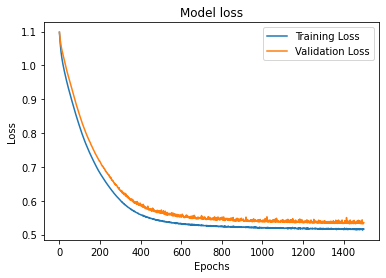

In [20]:
pt.plot(histVal.history['loss'])
pt.plot(histVal.history['val_loss'])
pt.title('Model loss')
pt.xlabel('Epochs')
pt.ylabel('Loss')
pt.legend(['Training Loss','Validation Loss'], loc='upper right')
pt.show()

Now, plot the accuracy between training data and validation data

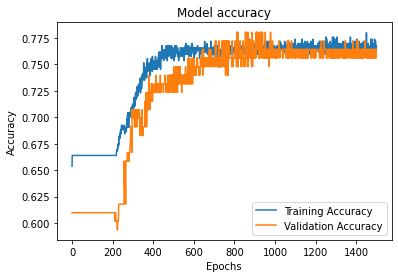

In [21]:
pt.plot(histVal.history['accuracy'])
pt.plot(histVal.history['val_accuracy'])
pt.title('Model accuracy')
pt.xlabel('Epochs')
pt.ylabel('Accuracy')
pt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
pt.show()

Finding the accuracy for the testing data set


In [22]:
Y_pred = neuralNetworkModel.predict(X_test)
Y_pred  = [1 if out>=0.5 else 0 for out in Y_pred] 
print('Testing Accuracy using L1 and L2 Regularizations: ', accuracy_score(Y_test,Y_pred)*100,'%')

Testing Accuracy using L1 and L2 Regularizations:  77.92207792207793 %


# **Part 3: Implementing different regularization methods(Dropout and L2) for the Neural Networks**

Importing necessary modules

In [23]:
import tensorflow as tf
tf.random.set_seed(1)
from keras.layers.core import Dropout
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD

**Building the model with Dropout Regularizer**

In [24]:
dropoutModel = Sequential()
#1st Hidden Layer
dropoutModel.add(Dense(12, activation='relu', input_shape=( 8 ,))) ,Dropout(0.4) #probability of dropping neurons
#2nd Hidden Layer
dropoutModel.add(Dense(15, activation='relu')) ,Dropout(0.4) #probability of dropping neurons
#Output Layer
dropoutModel.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate = 0.02)
dropoutModel.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
histDrop = dropoutModel.fit(X_train, Y_train, batch_size=32, epochs=1500,validation_split=0.2, verbose=0)

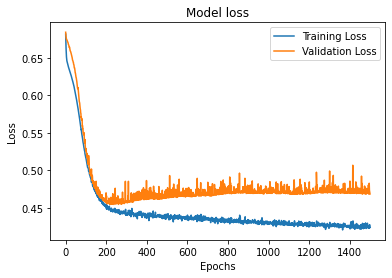

In [25]:
pt.plot(histDrop.history['loss'])
pt.plot(histDrop.history['val_loss'])
pt.title('Model loss')
pt.xlabel('Epochs')
pt.ylabel('Loss')
pt.legend(['Training Loss','Validation Loss'], loc='upper right')
pt.show()

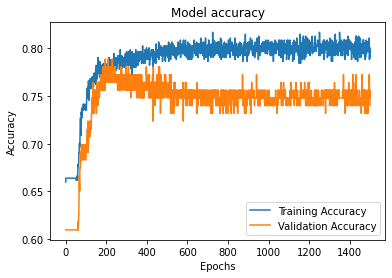

In [26]:
pt.plot(histDrop.history['accuracy'])
pt.plot(histDrop.history['val_accuracy'])
pt.title('Model accuracy')
pt.xlabel('Epochs')
pt.ylabel('Accuracy')
pt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
pt.show()

In [27]:
Y_pred = dropoutModel.predict(X_test)
Y_pred  = [1 if out>=0.5 else 0 for out in Y_pred] 
print('Testing Accuracy using Dropout Regularizer: ', accuracy_score(Y_test,Y_pred)*100,'%')

Testing Accuracy using Dropout Regularizer:  75.97402597402598 %


**Building the model with L2 Regularizer**

In [28]:
L2Model = Sequential()
#1st Hidden Layer, regularization parameter
L2Model.add(Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=( 8 ,))) #Regularization parameter λ = 0.01
#2nd Hidden Layer
L2Model.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #Regularization parameter λ = 0.01
#Output Layer
L2Model.add(Dense(1, activation='sigmoid'))

opt = SGD(learning_rate = 0.02)
L2Model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
histL2 = L2Model.fit(X_train, Y_train, batch_size=32, epochs=1500,validation_split=0.2, verbose=0)

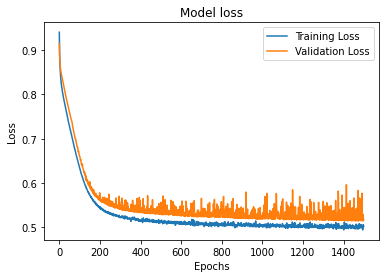

In [29]:
pt.plot(histL2.history['loss'])
pt.plot(histL2.history['val_loss'])
pt.title('Model loss')
pt.xlabel('Epochs')
pt.ylabel('Loss')
pt.legend(['Training Loss','Validation Loss'], loc='upper right')
pt.show()

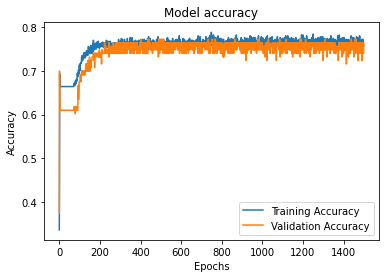

In [30]:
pt.plot(histL2.history['accuracy'])
pt.plot(histL2.history['val_accuracy'])
pt.title('Model accuracy')
pt.xlabel('Epochs')
pt.ylabel('Accuracy')
pt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
pt.show()

In [31]:
Y_pred = L2Model.predict(X_test)
Y_pred  = [1 if out>=0.5 else 0 for out in Y_pred] 
print('Testing Accuracy using L2 Regularizer: ', accuracy_score(Y_test,Y_pred)*100,'%')

Testing Accuracy using L2 Regularizer:  77.27272727272727 %
